In [7]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

I am a caterpillar.


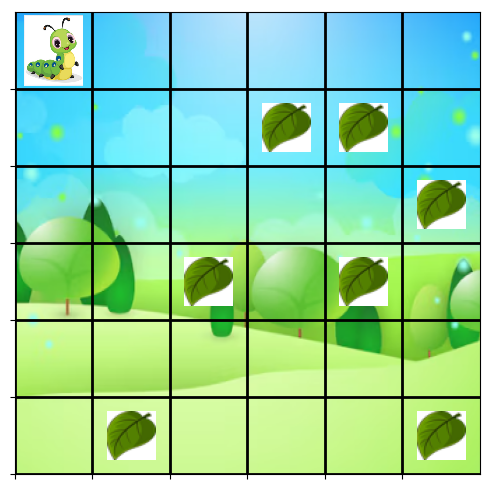

Running For 10 steps
State: (0, 0), Next State: (1, 0), Action: 1, Action Name: Down, Cumulative Reward: -1, Iteration: 1


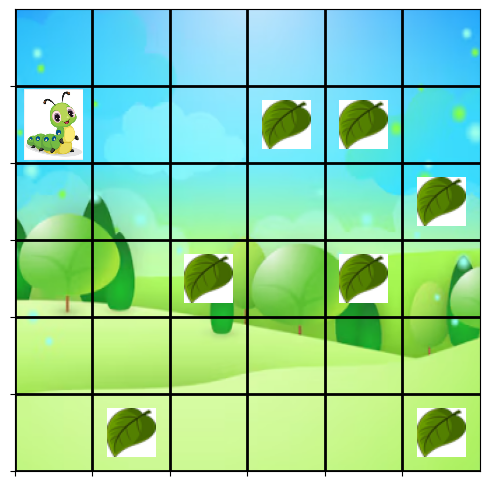

State: (1, 0), Next State: (1, 1), Action: 2, Action Name: Right, Cumulative Reward: -2, Iteration: 2


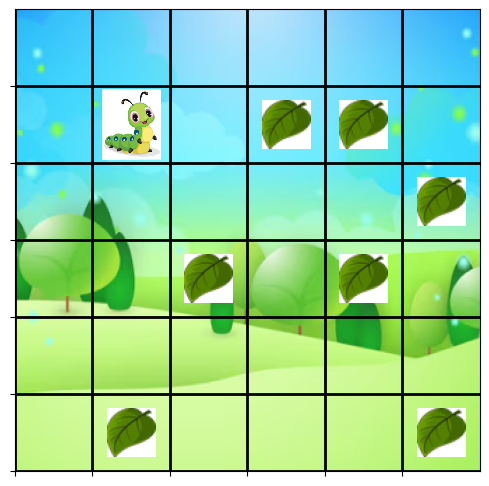

State: (1, 1), Next State: (0, 1), Action: 0, Action Name: Up, Cumulative Reward: -3, Iteration: 3


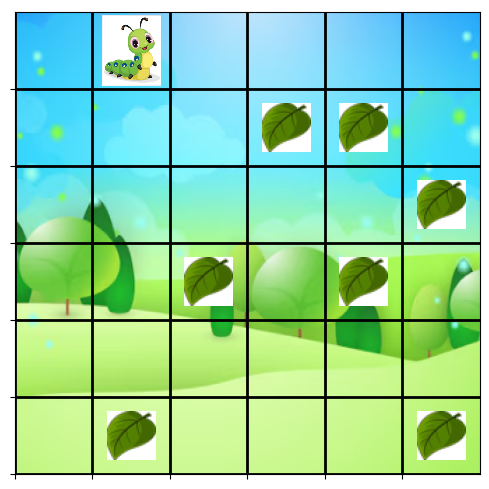

State: (0, 1), Next State: (0, 1), Action: 0, Action Name: Up, Cumulative Reward: -3, Iteration: 4
No movement.


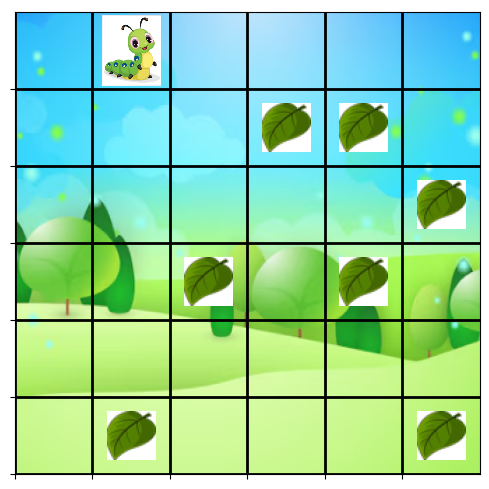

State: (0, 1), Next State: (1, 1), Action: 1, Action Name: Down, Cumulative Reward: -4, Iteration: 5


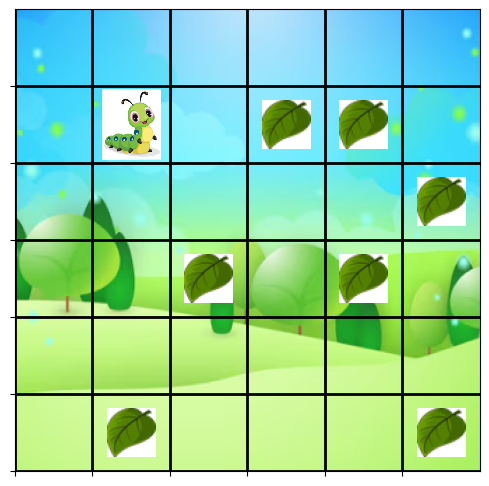

State: (1, 1), Next State: (1, 0), Action: 3, Action Name: Left, Cumulative Reward: -5, Iteration: 6


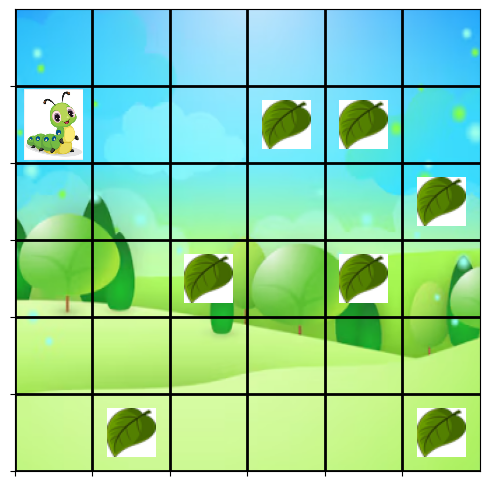

State: (1, 0), Next State: (1, 0), Action: 3, Action Name: Left, Cumulative Reward: -5, Iteration: 7
No movement.


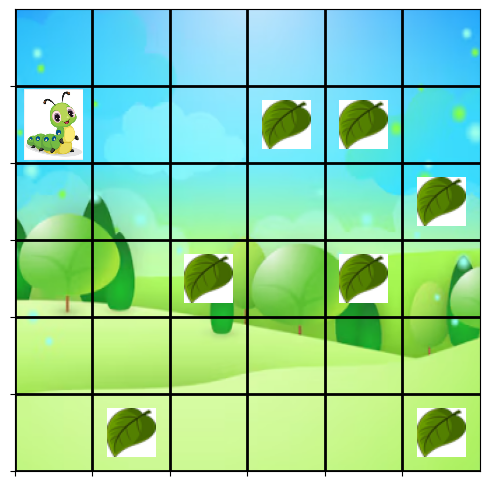

State: (1, 0), Next State: (2, 0), Action: 1, Action Name: Down, Cumulative Reward: -6, Iteration: 8


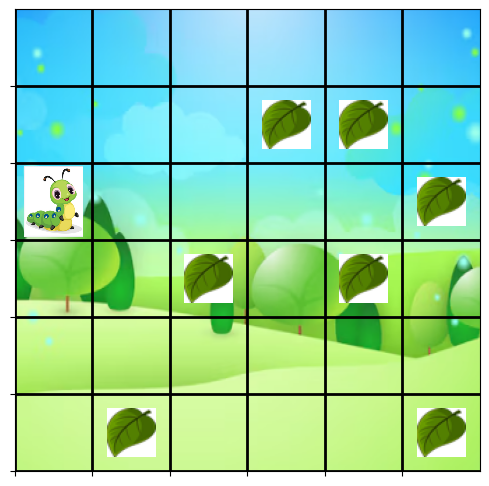

State: (2, 0), Next State: (3, 1), Action: 4, Action Name: Diagonal Down Right, Cumulative Reward: -7, Iteration: 9


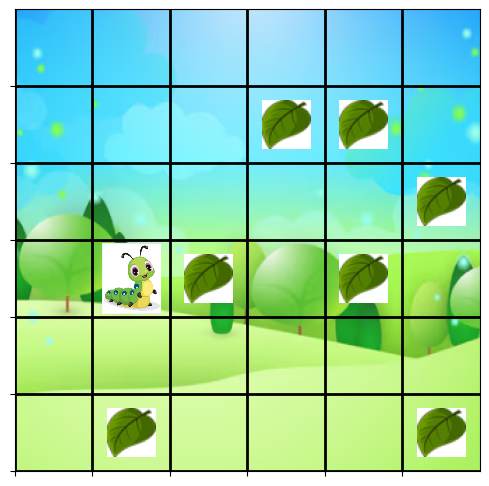

State: (3, 1), Next State: (4, 2), Action: 4, Action Name: Diagonal Down Right, Cumulative Reward: -8, Iteration: 10


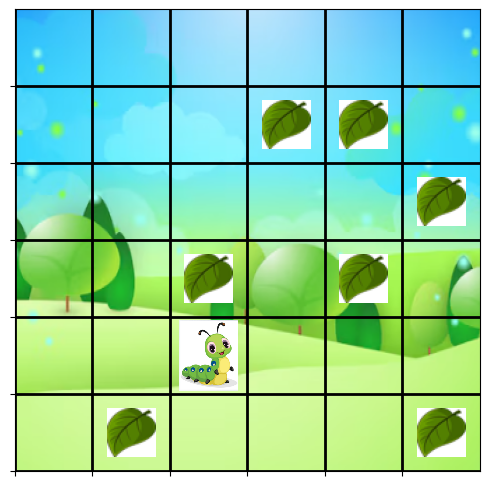

Manually set the agent's position to (5, 5) after completing all episodes/steps to see the butterfly


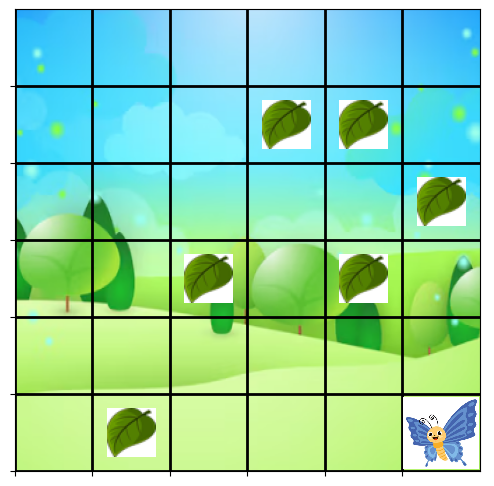

In [8]:

class GridWorld(gym.Env):
    def __init__(self):
        super().__init__()
        self.grid_size = 6
        self.state_space = self.grid_size * self.grid_size        
        self.action_space = gym.spaces.Discrete(5)
        self.action_names = ["Up", "Down", "Right", "Left", "Diagonal Down Right"]
        self.observation_space = gym.spaces.Discrete(self.state_space)
        self.rewards = np.zeros((self.grid_size, self.grid_size))
        self.rewards[1, 4] = 5 
        self.rewards[2, 5] = 15
        self.rewards[3, 4] = 10
        self.rewards[1, 3] = 10
        self.rewards[5, 1] = 25
        self.rewards[3, 2] = 20
        self.rewards[5, 5] = 100
        self.state = (0, 0)
        self.total_reward = 0

    def render(self):
        fig, ax = plt.subplots(figsize=(6, 6))

        ax.set_xlim(0, self.grid_size)
        ax.set_ylim(0, self.grid_size)
        ax.set_xticks(np.arange(0, self.grid_size, 1))
        ax.set_yticks(np.arange(0, self.grid_size, 1))   
        ax.grid(True, which='both', color='black', linewidth=2)
        ax.set_xticklabels([]) 
        ax.set_yticklabels([]) 
        ax.set_aspect('equal')

        # Load background image garden world
        try:
            background_img = Image.open("bonus_images/garden_world.png")
            ax.imshow(background_img, extent=[0, self.grid_size, 0, self.grid_size], aspect="auto")
        except FileNotFoundError:
            print("garden_world not found.")

        # Load leaf image for rewards
        leaf_image = "bonus_images/leaf.png"

        # Image size
        image_size = 0.2
        image_width = 35
        image_height = 35

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                reward = self.rewards[i, j]            
                if reward != 0:
                    try:
                        leaf_img = Image.open(leaf_image)
                        leaf_img = leaf_img.resize((image_width, image_height))
                        leaf_imagebox = OffsetImage(leaf_img)
                        leaf_ab = AnnotationBbox(leaf_imagebox, (j + 0.5, self.grid_size - 1 - i + 0.5), frameon=False, boxcoords="data")
                        ax.add_artist(leaf_ab)
                    except FileNotFoundError:
                        print(f"leaf not found.")

        agent_row, agent_col = self.state
        agent_image_path = "bonus_images/caterpillar.png"
        
        try:
            agent_img = Image.open(agent_image_path)
            agent_img = agent_img.convert("RGBA")
            agent_imagebox = OffsetImage(agent_img, zoom=image_size)
            agent_ab = AnnotationBbox(agent_imagebox, (agent_col + 0.5, self.grid_size - 1 - agent_row + 0.5), frameon=False, boxcoords="data")
            ax.add_artist(agent_ab)
        except FileNotFoundError:
            print(f"Agent image '{agent_image_path}' not found.")

        # Show butterfly image if the agent reaches the goal (5, 5)
        if self.state == (5, 5):
            try:
                butterfly_img = Image.open("bonus_images/butterfly.png")
                butterfly_img = butterfly_img.convert("RGBA")
                butterfly_imagebox = OffsetImage(butterfly_img, zoom=0.8*image_size)
                butterfly_ab = AnnotationBbox(butterfly_imagebox, (agent_col + 0.5, self.grid_size - 1 - agent_row + 0.5), frameon=False, boxcoords="data")
                ax.add_artist(butterfly_ab)
            except FileNotFoundError:
                print("Butterfly image not found.")

        plt.show()

    def step(self, action):
        row, col = self.state
        old_state = self.state
        if action == 0:
            row = max(0, row - 1)
        elif action == 1:
            row = min(self.grid_size - 1, row + 1)
        elif action == 2:
            col = min(self.grid_size - 1, col + 1)
        elif action == 3:
            col = max(0, col - 1)
        elif action == 4:
            if row < self.grid_size - 1 and col < self.grid_size - 1:
                row = row + 1
                col = col + 1

        self.state = (row, col)

        if self.state == old_state:
            return self.state, self.total_reward, False, False, {}

        reward_collected = self.rewards[row, col]

        if reward_collected != 0:
            self.total_reward += reward_collected
            self.rewards[row, col] = 0
        else:
            self.total_reward -= 1
        
        done = False
        if self.state == (5, 5):
            done = True
        
        return self.state, self.total_reward, done, False, {}

    def reset(self):
        self.state = (0, 0)
        self.total_reward = 0
        return self.state


env = GridWorld()
state = env.reset()
print("I am a caterpillar.")
env.render()
print("Running For 10 steps")
for iteration in range(10):
    action = env.action_space.sample()
    next_state, total_reward, done, _, _ = env.step(action)

    action_name = env.action_names[action]    
    print(f"State: {state}, Next State: {next_state}, Action: {action}, Action Name: {action_name}, Cumulative Reward: {total_reward}, Iteration: {iteration + 1}")
    if(state == next_state):
        print("No movement.")
    env.render()
    
    state = next_state
    if done:
        print("I am a Butterfly!")
        break

print("Manually set the agent's position to (5, 5) after completing all episodes/steps to see the butterfly")
env.state = (5, 5)
env.render()